In [196]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import pprint


### Question 3: (20 Points) Write code to find a 3-configuration on n points. Be clear as to your method and approach, and any math that you do to formulate it. Comment your code thoroughly. Hint: What dimension do you really need to solve an optimization problem for?

Here I will be using projected gradient descent to optimize the the the vectors to maximize the cost function. The cost function that I'll be using is the sum of square of distances between all the vectors combined. I am doing this for easier calculations.
<br>
F<sub><u>x</u></sub> = ∑ ∑( ||<u> x </u><sub> i </sub> - <u> x </u><sub> j </sub>||<sup>2</sup> )

<br>I am using projected gradient descent method to satisfy the constraints that all the points should lie on the spheriodal figure. 

<br>General Gradient Descent:
<br><u>x</u><sup>t+1</sup> = <u>x</u><sup>t</sup> + α<sub>t</sub>∇<sub><u>x</u></sub>F(<u>x</u><sup>t</sup>)

<br>
Projected Gradient Descent:
<br><u>x</u><sup>t+1</sup> = P<sub>c</sub>( <u>x</u><sup>t</sup> + α<sub>t</sub>∇<sub><u>x</u></sub>F(<u>x</u><sup>t</sup>))

P<sub>C</sub>(x) = <u>v</u> + (<u>x</u> − <u>v</u>) min[r / ||<u>x</u>-<u>v</u>||, 1]

In this problem <u>v</u> is the 0 vector as the spheroid is centred at the origin. r = 1 as this is a unit spheriod.

I'll be updating each vector individually by finding the derivative w.r.t. each of those vectors to find out the next vector and using the projected gradient descent formula above. 
<br>The derivative for each vertex will be equal to: <br>

∇<sub><u>xi</u></sub>F(x<sub>i</sub>) = 2 ∑<sup>n</sup><sub>j=1,j!=i</sub>(x<sub>i</sub> - x<sub>j</sub>)

In [302]:
#Calculates Pc 
def calculate_Pc(x, r=1):
    P = np.dot(x, min(r/np.linalg.norm(x),1))
    return P

In [303]:
#Calculates derivative w.r.t. xi
def calculate_Derivative(x,i):
    tot_sum = 0
    for j in range(len(x)):
        tot_sum += np.subtract(x[i],x[j])     
    return 2*tot_sum

In [304]:
def find_Configuration(d=3, n=2):
    #initialize x
    x = np.random.rand(n, d)
    
    #initialize alpha step size
    alpha = 0.001
    for itr in range(10000):
        x_new_arr = []
        #Loop through each vector for update
        for i in range(len(x)):
            d = calculate_Derivative(x,i)
            arg = np.add(x[i],np.dot(alpha,d))
            #calculate new vector
            new_x = calculate_Pc(arg)
            #append vector 
            x_new_arr.append(new_x)
        #update x 
        x = x_new_arr
    #return the array of vectors
    return x

### Question 4: (5 Points) Find a three-point 3-configuration. Show that the configuration is flat.

In [305]:
def calculate_distance(x, index):
    x_dist = []
    x_angle_intr = []
    X_Angle_Dict = {}
    for i in range(len(x)):
        if i != index :
            dist = np.linalg.norm(np.subtract(x[index],x[i]))
            x_dist.append(round(dist,3))
            x_angle_intr.append(np.subtract(x[index],x[i]))
            X_Angle_Dict[str(index)+"->"+str(i)] = np.subtract(x[index],x[i])
    return x_dist,x_angle_intr, X_Angle_Dict

def calculate_angle(x):
    x_angle = []
    x_angle_Dict = {}
    for i in x:
        for j in x:
            if j > i:
                a = np.dot(x[i],x[j])/((np.linalg.norm(x[i]))*(np.linalg.norm(x[j])))
                x_angle.append(round(np.arccos(a) / math.pi * 180, 2))
                x_angle_Dict["["+i+"] -> ["+j+"]"] = round(np.arccos(a) / math.pi * 180, 2)
                                   
    return x_angle, x_angle_Dict

In [306]:
def plane_equation(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = 0
    ab = np.subtract(a,b)
    ac = np.subtract(a,c)
    plane_coef = np.cross(ab, ac)
    
    d = np.dot(np.dot(-1, a),plane_coef)
    return plane_coef, d
    
def check_point_in_plane(plane_coef,d,x,index):
    z = x[index]
    z_cal = np.dot(plane_coef, z)
    return z_cal + d

def plot_Figure(X):
    X_axis_3 = X[:,0]
    Y_axis_3 = X[:,1]
    Z_axis_3 = X[:,2]


    fig = plt.figure()
 
    figure(figsize=(10, 7), dpi=100)    

    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    ax.plot3D(X_axis_3, Y_axis_3, Z_axis_3, 'red')

    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="blue")


    plt.show()

In [313]:
x_final_3 = find_Configuration(3,3)

Points in space calculated from the algorithm: 
[array([ 0.47730815, -0.11049672,  0.87176109]), array([ 0.4727074 , -0.20139784, -0.85789662]), array([-0.95001555,  0.31189457, -0.01386447])]

Checking if points lie on a plane: 
6.071532165918825e-18


<Figure size 432x288 with 0 Axes>

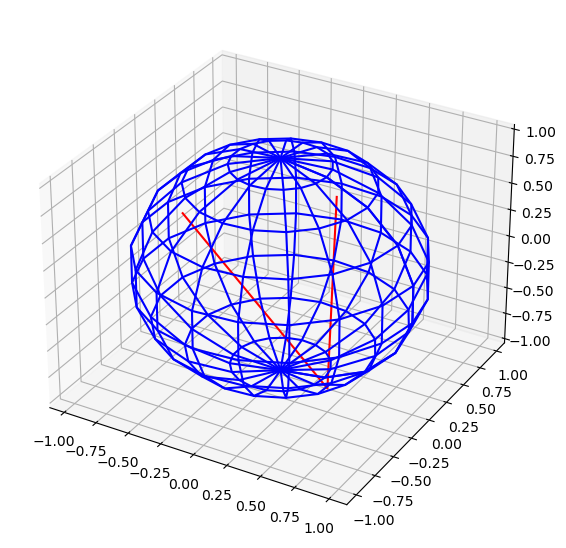

In [314]:
print("Points in space calculated from the algorithm: ")
print(x_final_3)

c, d = plane_equation(x_final_3)

print("\nChecking if points lie on a plane: ")
print(check_point_in_plane(c,d,x_final_3,2))

X_Final_NP_3 = np.array(x_final_3)

plot_Figure(X_Final_NP_3)

Here we are calculating the three-point 3-configuration. 
The points found in space are: <br>
<b>[[ 0.5159927 , -0.83987522,  0.16840768], [ 0.39753927,  0.72741031, -0.55931813], [-0.91353197,  0.11246491,  0.39091045]]</b>

To check whether the points lie on the plane, we check coplanarity of the vectors. We do this by taking the cross product between two vectors and dotting it with the third vector. If the result comes out to be 0, we can say that the vectors are coplanar. 
As we can see from above result, the resultant value comes out to be <b>6.071532165918825e-18</b> which is practically <b>0</b>. Therefore, we can say that the <b>three vectors lie on a plane</b>.


### Question 5: (5 Points) Find a four-point 3-configuration. Show that the configuration isn’t flat.

In [330]:
x_final_4 = find_Configuration(3,4)

Points in space calculated from the algorithm: 
[array([-0.14476775, -0.77993821, -0.60888314]), array([-0.02883589, -0.62410172,  0.78081082]), array([0.02945891, 0.79399138, 0.60721484]), array([ 0.14414473,  0.61004856, -0.77914251])]

Checking if points lie on a plane: 
-0.4630450085699263
0.0
0.0
-1.3877787807814457e-17


<Figure size 432x288 with 0 Axes>

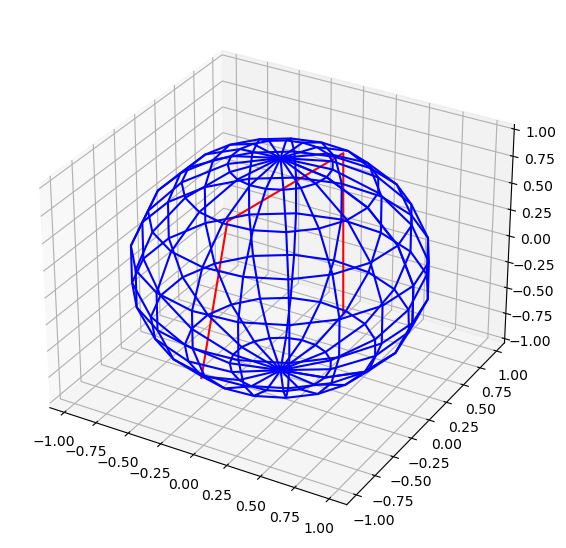

In [342]:
print("Points in space calculated from the algorithm: ")
print(x_final_4)

c4, d4 = plane_equation(x_final_4)

print("\nChecking if points lie on a plane: ")
print(check_point_in_plane(c4,d4,x_final_4,3))
print(check_point_in_plane(c4,d4,x_final_4,0))
print(check_point_in_plane(c4,d4,x_final_4,1))
print(check_point_in_plane(c4,d4,x_final_4,2))

X_Final_NP_4 = np.array(x_final_4)

plot_Figure(X_Final_NP_4)

Here we are calculating the four-point 3-configuration. 
The points found in space are: <br>
<b>[[-0.14476775, -0.77993821, -0.60888314], [-0.02883589, -0.62410172,  0.78081082], [0.02945891, 0.79399138, 0.60721484], [ 0.14414473,  0.61004856, -0.77914251]]</b>

As we can see from above result, the resultant value for coplanarity comes out to be <b>-0.4630450085699263</b> which is <b>not 0</b>. Therefore, we can say that the <b>three vectors do not lie on a plane and are not flat</b>.

### Question 6: (10 Points) Show that for any three- or four-point 3-configuration, the set of distances and angles to the other points is the same regardless of what point you measure from. We say the configuration is regular. How did you do it? What shapes do these configurations correspond to? Note that a regular Goncharov configuration will appear the same to viewers standing on any point.

Here, I will try to find distances and angles between all the vectors that are calculated from the algorithm.
Since, we have all the points available, distance is the simple formula of <b>||x<sub>i</sub> - x<sub>j</sub>||</b>.

For angles, I will first calculate the direction of two vectors connected to the point i by <b>x<sub>i</sub> - x<sub>j</sub></b> and <b>x<sub>i</sub> - x<sub>k</sub></b>. Then, I will find the <b>Cos</b> of the angle by taking dot product of both the angles and dividing it by the magnitude. By taking its <b>Cos inverse</b> we can get the angle between the vectors.

In [335]:
def distance_Angle_Set(X):
    x_Distance_Data = []
    for i in range(len(X)):
        x_Dist, y, ang_Dict = calculate_distance(X,i)
        x_Data_Df = []
        for j in range(len(x_Dist)):
            if i == j:
                x_Data_Df.append(0)
                
            x_Data_Df.append(x_Dist[j])
            
        
        if i == len(X)-1:
               x_Data_Df.append(0)
                
        pprint.pprint(calculate_angle(ang_Dict))
        x_Distance_Data.append(x_Data_Df)
        
    col = []
    for i in range(len(X)):
        col.append(str(i))
    
    df = pd.DataFrame(x_Distance_Data, columns=col)
    
    
    return df
    

In [337]:
print("Angle between the vectors: ")
distance_Data_Frame_3 = distance_Angle_Set(x_final_3)
print("\n")
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3,):
        print(distance_Data_Frame_3)

Angle between the vectors: 
([60.0], {'[0->1] -> [0->2]': 60.0})
([60.0], {'[1->0] -> [1->2]': 60.0})
([60.0], {'[2->0] -> [2->1]': 60.0})


       0      1      2
0  0.000  1.732  1.732
1  1.732  0.000  1.732
2  1.732  1.732  0.000


<b>For the three-point 3-configuration:</b><br>
Above, I am displaying the angles between the vectors and the distances between all the vectors in a matrix form.
In the angle map, I am displaying the angle value in degrees and the vectors between which the angle lies. For eg. [0->1] -> [0->2] is the angle between the vector that goes from [0->1] and the vector that goes from [0->2].

All the angles here are 60<sup>o</sup> and the distances between all the sides are equal to 1.732. This clearly shows that the configuration is an <b>equilateral triangle of side 1.732</b>.

In [343]:
distance_Data_Frame_4 = distance_Angle_Set(x_final_4)

print("\n")
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3,):
        print(distance_Data_Frame_4)

        
print("\nChecking if points lie on a plane: ")
print(check_point_in_plane(c4,d4,x_final_4,3))
print(check_point_in_plane(c4,d4,x_final_4,0))
print(check_point_in_plane(c4,d4,x_final_4,1))
print(check_point_in_plane(c4,d4,x_final_4,2))

([45.74, 89.61, 44.65],
 {'[0->1] -> [0->2]': 45.74,
  '[0->1] -> [0->3]': 89.61,
  '[0->2] -> [0->3]': 44.65})
([89.61, 45.74, 44.65],
 {'[1->0] -> [1->2]': 89.61,
  '[1->0] -> [1->3]': 45.74,
  '[1->2] -> [1->3]': 44.65})
([44.65, 45.74, 89.61],
 {'[2->0] -> [2->1]': 44.65,
  '[2->0] -> [2->3]': 45.74,
  '[2->1] -> [2->3]': 89.61})
([44.65, 89.61, 45.74],
 {'[3->0] -> [3->1]': 44.65,
  '[3->0] -> [3->2]': 89.61,
  '[3->1] -> [3->2]': 45.74})


       0      1      2      3
0  0.000  1.403  1.997  1.430
1  1.403  0.000  1.430  1.997
2  1.997  1.430  0.000  1.403
3  1.430  1.997  1.403  0.000

Checking if points lie on a plane: 
-0.4630450085699263
0.0
0.0
-1.3877787807814457e-17


<b>For the four-point 3-Configuration:</b><br>

The distance matrix shows that the configuration has equal lenghts of the opposide sides.
The opposite angles are also equal. But as we can see in the check for points lying on the plane, we can see that 3 points lie on a plane and 1 point doesn't. So this shape will be a <b>tetrahedron</b>.

### Question 7: (5 Points) Find five-point 3-configurations. What can you say about the sets of distances and angles between the points? How many distinct five-point configurations can you find?

In [338]:
x_Final_5_3 = find_Configuration(3,5)


In [339]:
distance_Data_Frame_5 = distance_Angle_Set(x_Final_5_3)
print("\n")
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3,):
        print(distance_Data_Frame_5)

([81.75, 17.76, 59.79, 89.97, 26.81, 64.43],
 {'[0->1] -> [0->2]': 81.75,
  '[0->1] -> [0->3]': 17.76,
  '[0->1] -> [0->4]': 59.79,
  '[0->2] -> [0->3]': 89.97,
  '[0->2] -> [0->4]': 26.81,
  '[0->3] -> [0->4]': 64.43})
([37.77, 67.9, 61.17, 87.63, 26.38, 87.98],
 {'[1->0] -> [1->2]': 37.77,
  '[1->0] -> [1->3]': 67.9,
  '[1->0] -> [1->4]': 61.17,
  '[1->2] -> [1->3]': 87.63,
  '[1->2] -> [1->4]': 26.38,
  '[1->3] -> [1->4]': 87.98})
([60.48, 52.87, 114.29, 15.2, 62.37, 63.48],
 {'[2->0] -> [2->1]': 60.48,
  '[2->0] -> [2->3]': 52.87,
  '[2->0] -> [2->4]': 114.29,
  '[2->1] -> [2->3]': 15.2,
  '[2->1] -> [2->4]': 62.37,
  '[2->3] -> [2->4]': 63.48})
([94.35, 37.16, 62.09, 77.17, 74.97, 25.7],
 {'[3->0] -> [3->1]': 94.35,
  '[3->0] -> [3->2]': 37.16,
  '[3->0] -> [3->4]': 62.09,
  '[3->1] -> [3->2]': 77.17,
  '[3->1] -> [3->4]': 74.97,
  '[3->2] -> [3->4]': 25.7})
([59.04, 38.91, 53.48, 91.24, 17.04, 90.82],
 {'[4->0] -> [4->1]': 59.04,
  '[4->0] -> [4->2]': 38.91,
  '[4->0] -> [4->3]':

<Figure size 432x288 with 0 Axes>

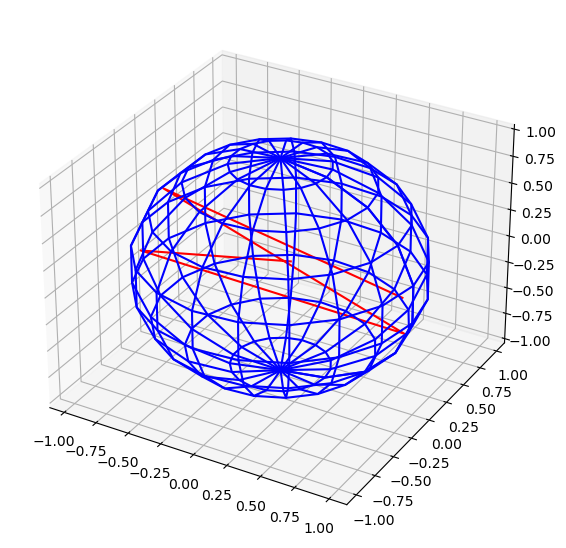


Checking if points lie on a plane: 
0.0
0.0
-2.220446049250313e-16
0.8875563583334142
0.8770201229547796


In [345]:
X_Final_NP_5 = np.array(x_Final_5_3)
plot_Figure(X_Final_NP_5)


c5, d5 = plane_equation(x_Final_5_3)

print("\nChecking if points lie on a plane: ")

print(check_point_in_plane(c5,d5,x_Final_5_3,0))
print(check_point_in_plane(c5,d5,x_Final_5_3,1))
print(check_point_in_plane(c5,d5,x_Final_5_3,2))
print(check_point_in_plane(c5,d5,x_Final_5_3,3))
print(check_point_in_plane(c5,d5,x_Final_5_3,4))

Above, I have found five-point 3-configuration with the angles and distances between all the points and vectors. 

Seeing the angles and distances, we can see that there is no consistency between any of the distances or angles. The figure is neither regular nor flat.  

But as I checked for the flatness of the figure I found that 3 points lie on a plane and 2 don't.

### Question 8: (15 Points) For a Goncharov d-configuration on n points, call it k-regular if it has k many ‘classes’ of points, based on sets of distances and angles to the other points when measured from any point (essentially, k different views of the other points are possible, depending on which point you stand on). For n = 2, 3, 4, . . . , 20, characterize all the 3-configurations you can find in terms of their regularity.

In [347]:
d = 3
flags = []


for k in range(2, 21):
    x_final = find_Configuration(d,k)
    regular_flag = True
    rank = np.linalg.matrix_rank(x_final)
    class_Dict = set({})
    for j in range(k):
        x1, a1, a1_Dict = calculate_distance(x_final,j)
        x2 = calculate_angle(a1_Dict)
        if j == 0:
            x_temp = x1
            x_temp.sort()
            class_Dict.add(str(x_temp))
        else:
            x1.sort()
            class_Dict.add(str(x1))
            if x_temp != x1:
                regular_flag = False
            
    flags.append(regular_flag)
    print("\nN = "+str(k)+"\nIs Regular = "+ str(regular_flag))
    print("Class List of Distances: ", class_Dict)
    print("Number of CLasses (k):", len(class_Dict))


N = 2
Is Regular = True
Class List of Distances:  {'[2.0]'}
Number of CLasses (k): 1

N = 3
Is Regular = True
Class List of Distances:  {'[1.732, 1.732]'}
Number of CLasses (k): 1

N = 4
Is Regular = True
Class List of Distances:  {'[1.139, 1.764, 1.894]'}
Number of CLasses (k): 1

N = 5
Is Regular = False
Class List of Distances:  {'[1.104, 1.217, 1.908, 1.913]', '[1.104, 1.289, 1.862, 1.911]', '[1.08, 1.289, 1.879, 1.908]', '[1.217, 1.233, 1.862, 1.879]', '[1.08, 1.233, 1.911, 1.913]'}
Number of CLasses (k): 5

N = 6
Is Regular = False
Class List of Distances:  {'[0.386, 1.573, 1.574, 1.793, 1.919]', '[0.699, 1.573, 1.592, 1.769, 1.837]', '[0.699, 1.16, 1.793, 1.803, 1.923]', '[1.074, 1.32, 1.574, 1.803, 1.837]', '[1.074, 1.16, 1.592, 1.812, 1.919]', '[0.386, 1.32, 1.769, 1.812, 1.923]'}
Number of CLasses (k): 6

N = 7
Is Regular = False
Class List of Distances:  {'[0.191, 1.458, 1.509, 1.721, 1.731, 1.897]', '[1.334, 1.443, 1.448, 1.504, 1.509, 1.871]', '[1.039, 1.263, 1.337, 1.731


N = 16
Is Regular = False
Class List of Distances:  {'[0.692, 0.963, 1.099, 1.141, 1.147, 1.205, 1.352, 1.45, 1.502, 1.548, 1.614, 1.737, 1.875, 1.941, 1.956]', '[0.344, 0.663, 0.967, 1.007, 1.038, 1.221, 1.42, 1.454, 1.528, 1.548, 1.804, 1.831, 1.889, 1.983, 1.989]', '[0.344, 0.734, 0.89, 1.158, 1.207, 1.234, 1.28, 1.304, 1.389, 1.725, 1.737, 1.859, 1.909, 1.973, 1.995]', '[0.566, 0.832, 0.863, 0.961, 1.175, 1.374, 1.389, 1.513, 1.528, 1.608, 1.614, 1.823, 1.869, 1.902, 1.968]', '[0.371, 0.481, 0.963, 0.967, 1.234, 1.255, 1.397, 1.461, 1.557, 1.651, 1.721, 1.851, 1.902, 1.902, 1.951]', '[0.566, 0.684, 0.919, 0.998, 1.165, 1.168, 1.299, 1.502, 1.516, 1.533, 1.725, 1.831, 1.951, 1.986, 1.994]', '[0.789, 0.8, 1.0, 1.132, 1.147, 1.163, 1.255, 1.418, 1.516, 1.715, 1.804, 1.823, 1.857, 1.859, 1.866]', '[0.468, 0.684, 0.895, 1.0, 1.175, 1.213, 1.258, 1.45, 1.562, 1.605, 1.802, 1.851, 1.909, 1.926, 1.983]', '[0.863, 1.141, 1.165, 1.221, 1.28, 1.336, 1.42, 1.461, 1.461, 1.549, 1.553, 1.605, 1


N = 20
Is Regular = False
Class List of Distances:  {'[0.614, 0.627, 0.816, 0.918, 1.056, 1.066, 1.093, 1.249, 1.321, 1.328, 1.475, 1.485, 1.721, 1.794, 1.87, 1.911, 1.946, 1.956, 1.97]', '[0.409, 0.555, 0.77, 0.906, 1.022, 1.067, 1.268, 1.319, 1.471, 1.485, 1.601, 1.656, 1.679, 1.72, 1.731, 1.798, 1.806, 1.95, 1.958]', '[0.68, 0.851, 0.86, 1.026, 1.093, 1.205, 1.28, 1.319, 1.328, 1.494, 1.533, 1.595, 1.618, 1.626, 1.754, 1.788, 1.803, 1.863, 1.962]', '[0.54, 0.68, 0.688, 0.906, 1.056, 1.066, 1.076, 1.288, 1.406, 1.5, 1.566, 1.601, 1.603, 1.759, 1.81, 1.861, 1.892, 1.954, 1.96]', '[0.433, 0.559, 0.615, 0.641, 1.011, 1.167, 1.268, 1.389, 1.435, 1.466, 1.557, 1.591, 1.609, 1.802, 1.803, 1.81, 1.911, 1.932, 1.97]', '[0.333, 0.528, 0.732, 0.864, 1.022, 1.043, 1.093, 1.233, 1.413, 1.422, 1.609, 1.626, 1.759, 1.795, 1.814, 1.823, 1.899, 1.958, 1.964]', '[0.335, 0.409, 0.54, 0.908, 1.093, 1.249, 1.331, 1.344, 1.476, 1.48, 1.557, 1.591, 1.622, 1.667, 1.786, 1.85, 1.863, 1.899, 1.96]', '[0.405

Please check above for classification for 3-configurations in terms of its regularity.

In the above output, I have displayed all the required information about regularity and the classes of the configuration. From N = 2 to 4, the configurations are regular and there is 1 class.

For N>4, all the configurations are not regular as the sets distances to all the other points differ when we try to calculate from each point. 

### Question 9: (10 Points) For what n are Goncharov 4-configurations less than four-dimensional? What dimension are they? What shapes do they correspond to? Show your work. Note you’ll need to extend the previous calculations and code by one dimension.

In [357]:
d = 4
flags = []

for k in range(2, 10):
    x_final = find_Configuration(d,k)
    regular_flag = True
    rank = np.linalg.matrix_rank(x_final)
    for j in range(k):
        x1, a1, a1_Dict = calculate_distance(x_final,j)
        x2 = calculate_angle(a1_Dict)
        if j == 0:
            x_temp = x1
            x_temp.sort()
        else:
            x1.sort()
            if x_temp != x1:
                regular_flag = False
    flags.append(regular_flag)
    
    
        
    print("\nN = "+str(k)+"\nIs Regular = "+ str(regular_flag)+"\nRank/Dimension = "+str(rank))
    
    if regular_flag:
        print("Angle List: ")
        distance_Data_Frame = distance_Angle_Set(x_final)
        print("\nDistance Matrix:")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3,):
            print(distance_Data_Frame)
        X_Final_NP = np.array(x_final)
        print(x_final)
        
    


N = 2
Is Regular = True
Rank/Dimension = 2
Angle List: 
([], {})
([], {})

Distance Matrix:
     0    1
0  0.0  2.0
1  2.0  0.0
[array([ 0.17724146,  0.26283513, -0.83035964,  0.45826415]), array([-0.17724146, -0.26283513,  0.83035964, -0.45826415])]

N = 3
Is Regular = True
Rank/Dimension = 3
Angle List: 
([60.0], {'[0->1] -> [0->2]': 60.0})
([60.0], {'[1->0] -> [1->2]': 60.0})
([60.0], {'[2->0] -> [2->1]': 60.0})

Distance Matrix:
       0      1      2
0  0.000  1.732  1.732
1  1.732  0.000  1.732
2  1.732  1.732  0.000
[array([ 0.25584324, -0.44102935,  0.09887102, -0.85455361]), array([-0.05053065, -0.51591862,  0.1062167 ,  0.8485238 ]), array([-0.20531259,  0.95694797, -0.20508772,  0.0060298 ])]

N = 4
Is Regular = True
Rank/Dimension = 4
Angle List: 
([56.32, 67.73, 55.95],
 {'[0->1] -> [0->2]': 56.32,
  '[0->1] -> [0->3]': 67.73,
  '[0->2] -> [0->3]': 55.95})
([67.73, 56.32, 55.95],
 {'[1->0] -> [1->2]': 67.73,
  '[1->0] -> [1->3]': 56.32,
  '[1->2] -> [1->3]': 55.95})
([55.

I am finding the rank of the final set of vectors determine the dimension of the configuration.

As we can see from the above result, when N<4, the configurations are less the four dimensional. 

For N = 2 and N = 3, it is 2-Dimensional. 
For N = 2, the figure is just a straight line and for N = 3, the figure is an equilateral triangle where each side is 1.732 long. 

For N = 4, the figure is 4-dimensional and is Regular because the distance set is the same from all the points and the angles are also the same. It can be a 4-dimensional tetrahedron but I'm not sure.


### Question 10: (5 Points) Find a regular 4-configuration that is four dimensional. What n did you find?

When N = 4, the figure is regular as well as 4 dimensional. 

### Question 11: (10 Points) Sample points uniformly on the unit sphere by picking a vector Z = (Z1, Z2, . . . , Zd), with Zi ∼ N (0, 1), and then scale Z to be a unit vector. For a set of 10 points in d = 3 dimensions generated in this way, estimate the average distance from a point to its nearest neighbor, and the variance of this distance. Compare to the average distance in a 10-point Goncharov 3-configuration between any point and its nearest neighbor. Which gives you more uniform coverage of the sphere, and why?

In [366]:
def generate_Points(d = 3, N = 10):
    Z = []
    for i in range(N):
        a = np.random.normal(0,1, size = (1,d))
        a = a /(np.linalg.norm(a))
        Z.append(a)
    return Z


def distance_Set(X):
    x_Distance_Data = []
    for i in range(len(X)):
        x_Dist, y, ang_Dict = calculate_distance(X,i)
        x_Data_Df = []
        for j in range(len(x_Dist)):
            if i == j:
                x_Data_Df.append(0)
                
            x_Data_Df.append(x_Dist[j])
            
        if i == len(X)-1:
               x_Data_Df.append(0)
                
        x_Distance_Data.append(x_Data_Df)
        
    col = []
    for i in range(len(X)):
        col.append(str(i))
    
    df = pd.DataFrame(x_Distance_Data, columns=col)
    
    
    return df


Z = generate_Points(3, 10)
print(Z)
print("\n")
df = distance_Set(Z)
print(df)


[array([[ 0.36174797, -0.75399433, -0.54829823]]), array([[-0.423486  ,  0.72548423,  0.54252395]]), array([[0.7185126 , 0.69541891, 0.01149727]]), array([[ 0.67835865, -0.66050766,  0.32180612]]), array([[-0.63686473,  0.62080729,  0.45716694]]), array([[-0.58651027,  0.60456205, -0.53899019]]), array([[-0.66004474, -0.11506027, -0.7423625 ]]), array([[-0.77756136, -0.33203148, -0.5339976 ]]), array([[ 0.85732184, -0.40321396,  0.32002775]]), array([[-0.42425556, -0.28729525, -0.85875995]])]


       0      1      2      3      4      5      6      7      8      9
0  0.000  1.999  1.594  0.931  1.974  1.657  1.221  1.215  1.060  0.965
1  1.999  0.000  1.260  1.784  0.253  1.100  1.554  1.550  1.722  1.729
2  1.594  1.260  0.000  1.392  1.429  1.419  1.768  1.895  1.150  1.740
3  0.931  1.784  1.392  0.000  1.841  1.985  1.795  1.720  0.313  1.658
4  1.974  0.253  1.429  1.841  0.000  0.998  1.407  1.382  1.817  1.613
5  1.657  1.100  1.419  1.985  0.998  0.000  0.751  0.956  1.959  0.

In [367]:
def get_Average_and_Variance(df):
    X_Nearest_Neighbour = []
    for X in df.to_numpy():
        print(X)
        X_Nearest_Neighbour.append(min(i for i in X if i > 0))
    
    print(X_Nearest_Neighbour)
    avg = np.mean(np.array(X_Nearest_Neighbour))
    var = np.var(np.array(X_Nearest_Neighbour))
    
    return avg, var



In [372]:
avg, var = get_Average_and_Variance(df)
print("\n")
print("Average distance from a point to its nearest neighbor: ", avg)
print("Variance: ", var)

[0.    1.999 1.594 0.931 1.974 1.657 1.221 1.215 1.06  0.965]
[1.999 0.    1.26  1.784 0.253 1.1   1.554 1.55  1.722 1.729]
[1.594 1.26  0.    1.392 1.429 1.419 1.768 1.895 1.15  1.74 ]
[0.931 1.784 1.392 0.    1.841 1.985 1.795 1.72  0.313 1.658]
[1.974 0.253 1.429 1.841 0.    0.998 1.407 1.382 1.817 1.613]
[1.657 1.1   1.419 1.985 0.998 0.    0.751 0.956 1.959 0.961]
[1.221 1.554 1.768 1.795 1.407 0.751 0.    0.323 1.875 0.314]
[1.215 1.55  1.895 1.72  1.382 0.956 0.323 0.    1.846 0.482]
[1.06  1.722 1.15  0.313 1.817 1.959 1.875 1.846 0.    1.745]
[0.965 1.729 1.74  1.658 1.613 0.961 0.314 0.482 1.745 0.   ]
[0.931, 0.253, 1.15, 0.313, 0.253, 0.751, 0.314, 0.323, 0.313, 0.314]


Average distance from a point to its nearest neighbor:  0.4915
Variance:  0.09630164999999997


In [364]:
X_10_3 = find_Configuration(3, 10)

In [371]:
df_2 = distance_Set(X_10_3)

avg2, var2 = get_Average_and_Variance(df_2)
print("\n")
print("Average distance from a point to its nearest neighbor: ", avg2)
print("Variance: ", var2)

[0.    1.645 1.926 1.854 0.531 1.985 1.397 0.949 1.69  0.463]
[1.645 0.    1.148 1.652 1.286 1.219 1.818 1.241 1.34  1.862]
[1.926 1.148 0.    1.028 1.835 0.344 1.688 1.904 0.583 1.901]
[1.854 1.652 1.028 0.    1.983 0.764 0.897 1.753 1.311 1.634]
[0.531 1.286 1.835 1.983 0.    1.933 1.656 0.825 1.638 0.963]
[1.985 1.219 0.344 0.764 1.933 0.    1.498 1.86  0.871 1.917]
[1.397 1.818 1.688 0.897 1.656 1.498 0.    1.255 1.805 1.127]
[0.949 1.241 1.904 1.753 0.825 1.86  1.255 0.    1.946 1.165]
[1.69  1.34  0.583 1.311 1.638 0.871 1.805 1.946 0.    1.675]
[0.463 1.862 1.901 1.634 0.963 1.917 1.127 1.165 1.675 0.   ]
[0.463, 1.148, 0.344, 0.764, 0.531, 0.344, 0.897, 0.825, 0.583, 0.463]


Average distance from a point to its nearest neighbor:  0.6362000000000001
Variance:  0.06265895999999999


The mean in the Gancharov's 10 points are <b>higher than when the points are calculated from normal distribution</b>. 
The <b>variance is also lower</b> in the case of Gancharov's 10 points.

This means that the average distances between points in Gancharov's 10 points are higher and are closer to mean than in the case of normally distributed points. <b>This in turn gives more coverage over the sphere in the case of Gancharov's 10 points.</b>